# HomeWork 1 Question 3

In [121]:
# Import our libraries
import numpy as np
import matplotlib.pyplot as plt

## (PART A) Create the Training Dataset

In [122]:
# uniformly spaced input values xn
training_set = np.linspace(0, 1, 10)

print("training set input values: \n", training_set)

training set input values: 
 [0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]


In [123]:
# Create the target dataset 
sine = []
target_set = []

# populate the target set (adding a gaussian distribution to sin(2pi(x))) 
for num in training_set:
    # model
    sine.append(np.sin(2*np.pi*num))
    # gaussian noise: mean 0 and variance 2 (sqrt of standard deviation)
    random_noise =  np.random.normal(loc = 0, scale = np.sqrt(0.2))
    print("Random Noise: ", random_noise)
    target_set.append(np.sin(2*np.pi*num) + random_noise)
    
print("\n Model: \n ", sine)
print("\nTarget set: \n", target_set)

Random Noise:  -0.014568624738078104
Random Noise:  0.5502248543897397
Random Noise:  0.11824126669434148
Random Noise:  0.08039000993666462
Random Noise:  0.6358427014690893
Random Noise:  0.19755893441339484
Random Noise:  0.22376701220518203
Random Noise:  0.04862569162485997
Random Noise:  -0.22528078305261956
Random Noise:  0.6165145813504473

 Model: 
  [0.0, 0.6427876096865393, 0.984807753012208, 0.8660254037844387, 0.3420201433256689, -0.34202014332566866, -0.8660254037844385, -0.9848077530122081, -0.6427876096865396, -2.4492935982947064e-16]

Target set: 
 [-0.014568624738078104, 1.193012464076279, 1.1030490197065494, 0.9464154137211034, 0.9778628447947582, -0.14446120891227382, -0.6422583915792565, -0.9361820613873482, -0.8680683927391591, 0.6165145813504471]


## (PART B) Curve Fitting

Polynomial form:   
-1.354 x + 0.9004


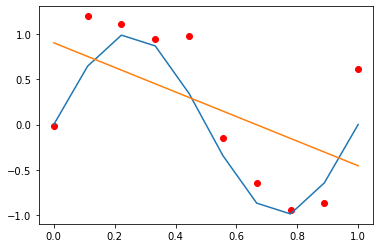

In [124]:
# Polynomial curve fitting using polyfit
# Computes optimal weights
model_1 = np.polyfit(training_set, target_set, 1)
poly_1 = np.poly1d(model_1)
print("Polynomial form: ", poly_1)

# This is an example of underfitting (not complex enough)
# Blue = Model
# Red = Training Data
# Orange = Learned Model
plt.plot(training_set, sine)
plt.scatter(training_set, target_set, color = 'red')
plt.plot(training_set, poly_1(training_set))

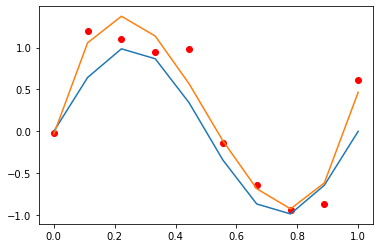

In [125]:
# plotting a model with complexity M = 3
model_3 = np.polyfit(training_set, target_set, 3)
poly_3 = np.poly1d(model_3)

plt.plot(training_set, sine)
plt.scatter(training_set, target_set, color = 'red')
plt.plot(training_set, poly_3(training_set))

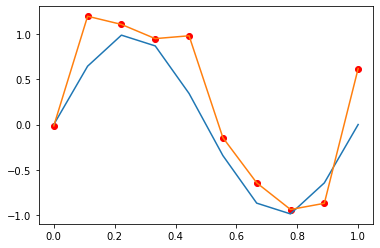

In [126]:
# plotting a model with complexity M = 9
model_9 = np.polyfit(training_set, target_set, 9)
poly_9 = np.poly1d(model_9)

plt.plot(training_set, sine)
plt.scatter(training_set, target_set, color = 'red')
plt.plot(training_set, poly_9(training_set))

If the complexity of the model is too low, it will underfit, meaning that the model will not be accurate on the given training and will not generalize well either. If the complexity of the model is too high, it will overfit, meaning that the model will be extremely accurate on the training data, but will not generalize will to other data sets.  

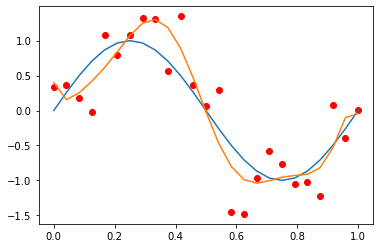

In [127]:
# Now to test complexity M = 9 with varying data set sizes
# N = 25
training_set = np.linspace(0, 1, 25)

sine = []
target_set = []

for num in training_set:
    sine.append(np.sin(2*np.pi*num))
    target_set.append(np.sin(2*np.pi*num) + np.random.normal(loc = 0, scale = np.sqrt(0.2)))
    
model = np.polyfit(training_set, target_set, 9)
poly = np.poly1d(model)

plt.plot(training_set, sine)
plt.scatter(training_set, target_set, color = 'red')
plt.plot(training_set, poly(training_set))

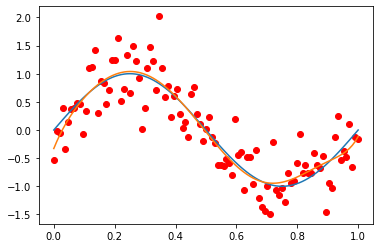

In [128]:
# N = 105
training_set = np.linspace(0, 1, 105)

sine = []
target_set = []

# populate the sine graph for visualization 
# populate the target set (adding a gaussian distribution to sin(2pi(x))) 
for num in training_set:
    sine.append(np.sin(2*np.pi*num))
    target_set.append(np.sin(2*np.pi*num) + np.random.normal(loc = 0, scale = np.sqrt(0.2)))
    
model = np.polyfit(training_set, target_set, 9)
poly = np.poly1d(model)

plt.plot(training_set, sine)
plt.scatter(training_set, target_set, color = 'red')
plt.plot(training_set, poly(training_set))

The problem of overfitting goes away with the increase in training set size. As the training set increases, the model overfits less (will generalize better). 

## (PART C) Model Selection 


RMS training results:
[0.8766909892253476, 0.7575202305853967, 0.7560067522790719, 0.4602086525739734, 0.4433738002326845, 0.32676963070445797, 0.29918271173518507, 0.21527652171291453, 0.21326957779872877, 3.008287219230404e-10]
RMS testing results:
[0.9086799797727175, 1.1540038677802402, 1.1632903532830818, 1.5643351769741942, 1.5847009767442288, 1.6430290526183708, 1.61864669284979, 1.6215381615670197, 1.6224899598183544, 1.6563207524425154]


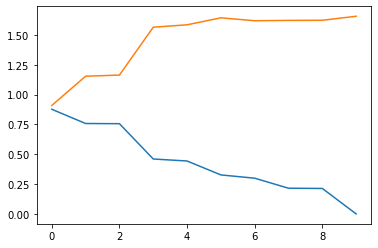

In [129]:
# Will hold RMS results for each complexity 
RMS_training_plot = []
RMS_testing_plot = []

N = 10
input_set_training = np.linspace(0, 1, N)
# New indpendent test set to compute RMS error on 
input_set_testing = np.linspace(1.5, 2.5, N)

# target sets for our training and testing data
target_set_training = []
target_set_testing = []

complexity = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Populating our training set targets
for num in input_set_training:
    target_set_training.append(np.sin(2*np.pi*num) + np.random.normal(loc = 0, scale = np.sqrt(0.2)))

# Populating our testing set targets using the same model
for num in input_set_testing:
    target_set_testing.append(np.sin(2*np.pi*num) + np.random.normal(loc = 0, scale = np.sqrt(0.2)))
    
#print("\nTraining targets: ", target_set_training)    
#print("\nTesting targets: ", target_set_testing)      
    
for M in complexity:
    #print("\nCalculating for Complexity: ", M)
    
    # find weights for current complexity with polyfit
    weights_tr = np.polyfit(input_set_training, target_set_training, M)
    poly_tr = np.poly1d(weights_tr)
    #print("\nOptimal training weights: ", poly_tr)
    
    # y(xn, w*) prediction for our current complexity 
    predictions_tr = poly_tr(input_set_training)
    #print("\nPredictions for training set:")
    #print(predictions_tr)
    
    # Will hold result for (y(xn, w*) - tn)^2
    accuracy_tr = []
    accuracy_t = []
    
    # Summation from 1 to N
    for i in range(1, N+1):
        # finding the difference for every true value 
        #print(f"\ndifference for point ({i}), complexity ({M}): ", (predictions_tr[i-1] - target_set_training[i-1]))
        temp_tr = np.square(predictions_tr[i-1] - target_set_training[i-1])
        #print(f"\nsquared difference for point ({i}), complexity ({M}): ")
        #print(temp_tr)
        
        #print(f"\ndifference for point ({i}), complexity ({M}): ", (predictions_tr[i-1] - target_set_testing[i-1]))
        temp_t = np.square(predictions_tr[i-1] - target_set_testing[i-1])
        #print(f"\nsquared difference for point ({i}), complexity ({M}): ")
        #print(temp_t)
        
        accuracy_tr.append(temp_tr)
        accuracy_t.append(temp_t)
        
    # Finding E(w*)
    #print("\ntraining accuracy array: ", accuracy_tr)
    optimal_error_tr = (0.5 * sum(accuracy_tr))
    #print("\ntraining E of w* for complexity: ", M)
    #print(optimal_error_tr)
    
    #print("\ntesting accuracy array: ", accuracy_t)
    optimal_error_t = (0.5 * sum(accuracy_t))
    #print("\ntesting E of w* for complexity: ", M)
    #print(optimal_error_t)
    
    RMS_training = np.sqrt((2 * optimal_error_tr)/N)
    #print("\nRMS error for training set at complexity: ", M)
    #print(RMS_training)
    RMS_training_plot.append(RMS_training)

    RMS_testing = np.sqrt((2 * optimal_error_t)/N)
    #print("\nRMS error for testing set at complexity: ", M)
    #print(RMS_testing)
    RMS_testing_plot.append(RMS_testing)

print("\nRMS training results:")
print(RMS_training_plot)

print("RMS testing results:")
print(RMS_testing_plot)

plt.plot(complexity, RMS_training_plot)
plt.plot(complexity, RMS_testing_plot)

## (Part D) Overtuning

In [130]:
N = 10
training_set = np.linspace(0, 1, N)

target_set = []

complexity = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

for num in training_set:
    target_set.append(np.sin(2*np.pi*num) + np.random.normal(loc = 0, scale = np.sqrt(0.2)))
    
for M in complexity: 
    # find weights for current complexity with polyfit
    weights = np.polyfit(training_set, target_set, M)
    print(f"Magnitube of model weights for complexity: {M}\n", abs(weights))

Magnitube of model weights for complexity: 0
 [0.1084556]
Magnitube of model weights for complexity: 1
 [1.57963672 0.89827396]
Magnitube of model weights for complexity: 2
 [1.6381988  3.21783552 1.14097008]
Magnitube of model weights for complexity: 3
 [17.49120002 24.59860123  6.73703264  0.53633601]
Magnitube of model weights for complexity: 4
 [32.21385836 46.9365167  15.56929623  1.21700646  0.74844372]
Magnitube of model weights for complexity: 5
 [121.16028104 335.11456096 311.19556588 109.05716741  12.43247321
   0.87155531]
Magnitube of model weights for complexity: 6
 [4.15553753e+02 1.36782154e+03 1.73661740e+03 1.03643247e+03
 2.77556496e+02 2.60902236e+01 9.22736692e-01]
Magnitube of model weights for complexity: 7
 [7.26270512e+02 2.12639304e+03 2.13489906e+03 6.65317131e+02
 1.86960258e+02 1.34309303e+02 1.74089873e+01 9.14709075e-01]
Magnitube of model weights for complexity: 8
 [1.01855568e+04 4.14684977e+04 6.86720308e+04 5.91740171e+04
 2.80628922e+04 7.07559144e+03

As you can see as model size (model complexity) grows larger, the magnitude of the weights grows dramatically. 

## (Part E) Regularization

In [131]:
M = 9
N = 10
training_set = np.linspace(0, 1, N)
training_set_transpose = training_set.transpose()

# xt
xt = np.multiply(training_set, target_set)
print(xt)

# x^Tx
xTx = np.multiply(training_set_transpose, training_set)
print(xTx)

# setting values for lambda
lambda_set = [np.exp(-40), np.exp(-35), np.exp(-30), np.exp(-25), np.exp(-20)]

target_set = []

for num in training_set:
    target_set.append(np.sin(2*np.pi*num) + np.random.normal(loc = 0, scale = np.sqrt(0.2)))
    


[ 0.          0.03999952  0.17554683  0.42916779  0.1589827  -0.2777506
 -0.44283421 -0.76241702 -0.69484483  0.30753857]
[0.         0.01234568 0.04938272 0.11111111 0.19753086 0.30864198
 0.44444444 0.60493827 0.79012346 1.        ]
